<a href="https://colab.research.google.com/github/elyesboujelben1/gomycode/blob/main/checkpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic-passengers.csv",";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.isnull().sum()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S


In [ ]:

df["Embarked"].fillna("S",inplace=True)
df.isnull().sum()

df.dropna(1,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

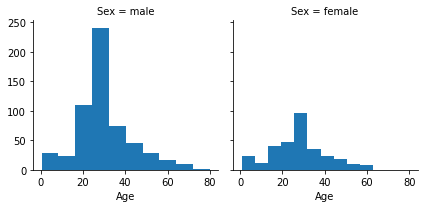

In [ ]:
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,"Age")

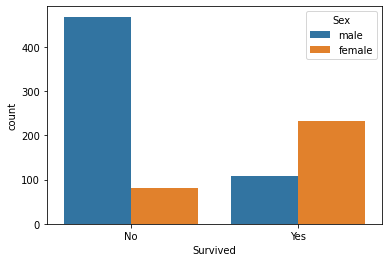

In [ ]:
ax = sns.countplot(x="Survived", hue="Sex", data=df)


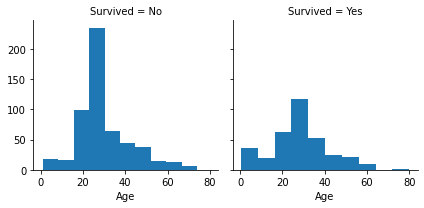

In [ ]:
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"Age")

None


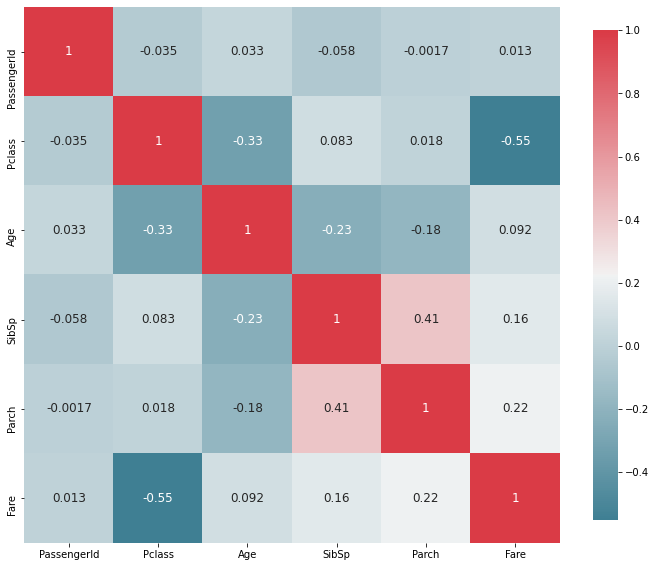

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

print (plot_correlation_map(df))



```
# This is formatted as code
```

this function returns every possible correllateral in the dataset with a graph looking like a heat map which helps us compare each correllateral to the others


In [ ]:
df.groupby(['Survived'],group_keys=["Pclass"]).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
No,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
Yes,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [89]:
ncolunms=df.shape[1]
nrows=df.shape[0]
newcolumn=[]
for i in df["Name"]:
  point=i.find(".")
  virgule=i.find(",")
  title=i[2+virgule:point]
  newcolumn.append(title)
df["Titles"]=newcolumn


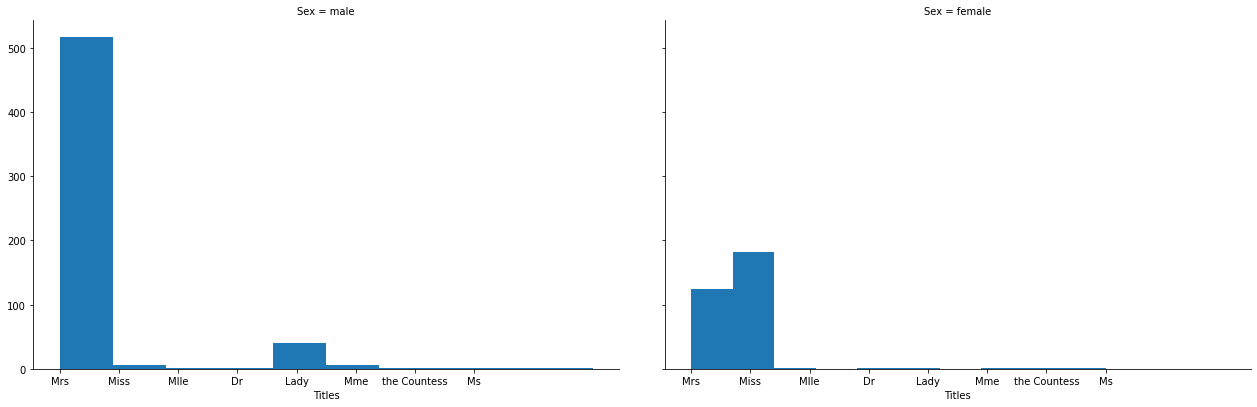

In [ ]:
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,"Titles")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

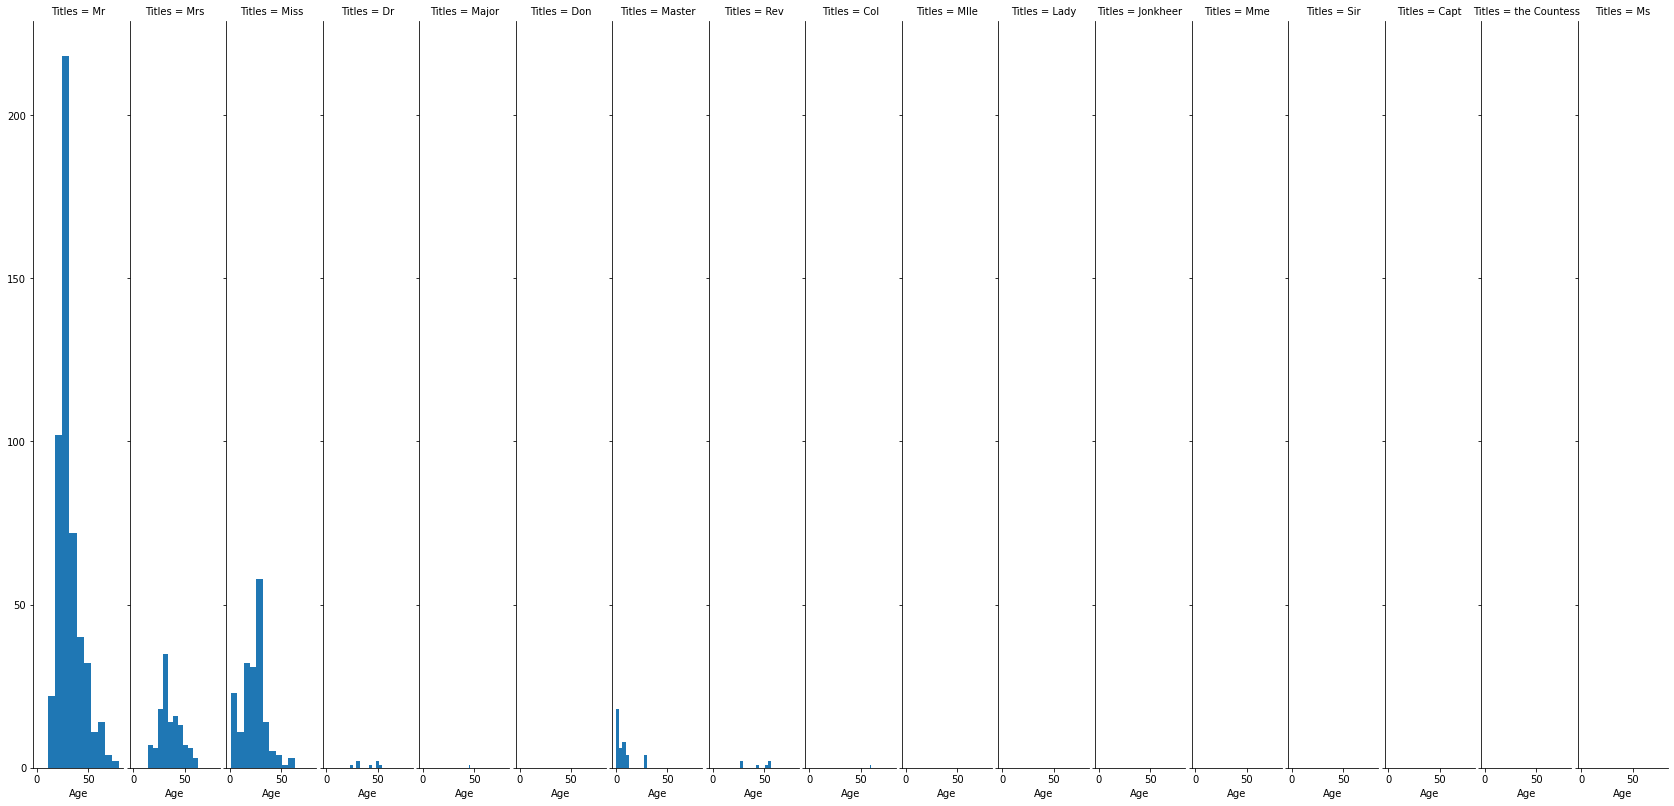

In [ ]:
g=sns.FacetGrid(df,col="Titles")
g.map(plt.hist,"Age")
g.fig.set_figwidth(23)
g.fig.set_figheight(15)

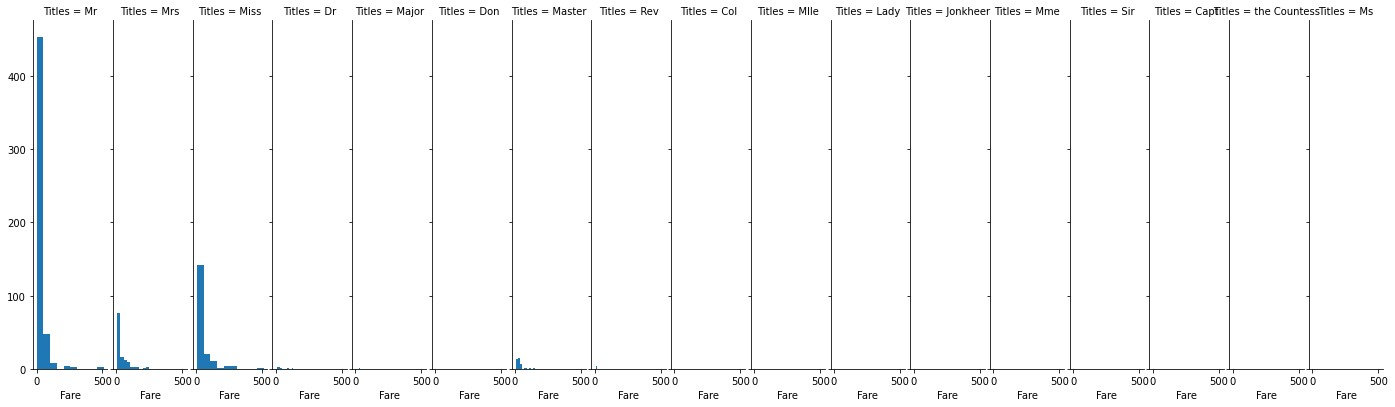

In [ ]:
g=sns.FacetGrid(df,col="Titles")
g.map(plt.hist,"Fare")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

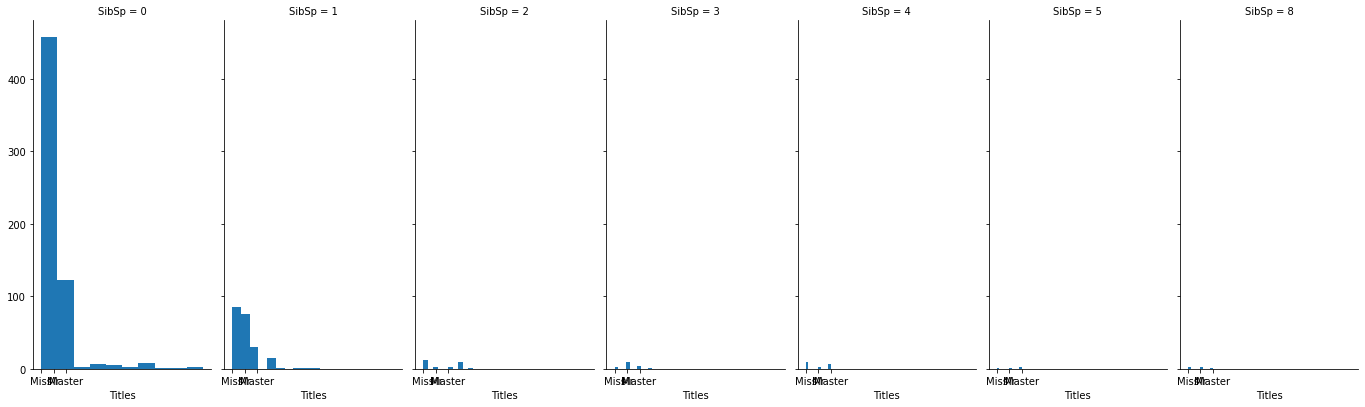

In [ ]:
g=sns.FacetGrid(df,col="SibSp")
g.map(plt.hist,"Titles")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

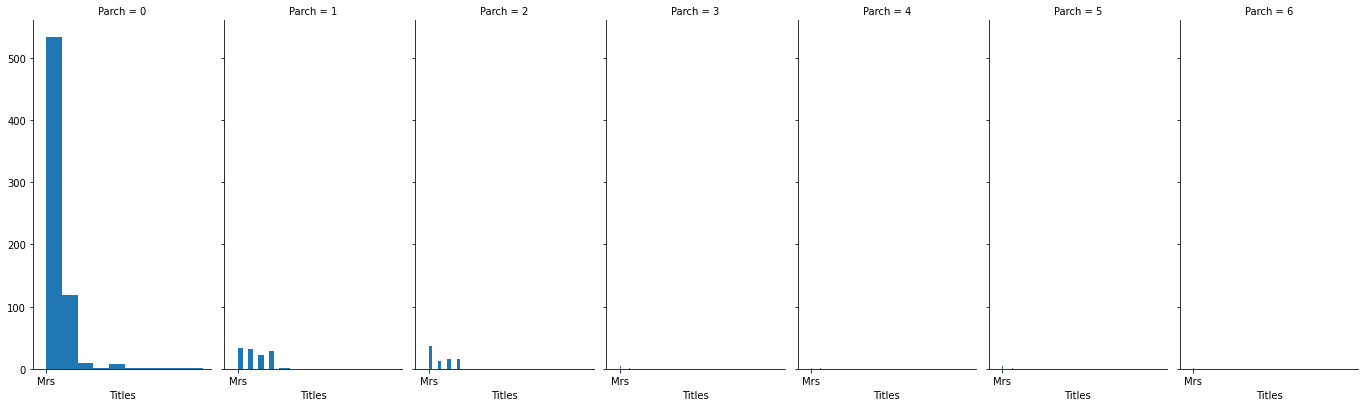

In [ ]:
g=sns.FacetGrid(df,col="Parch")
g.map(plt.hist,"Titles")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

In [86]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                   "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


for i in df["Titles"]:
  i=Title_Dictionary[i]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr


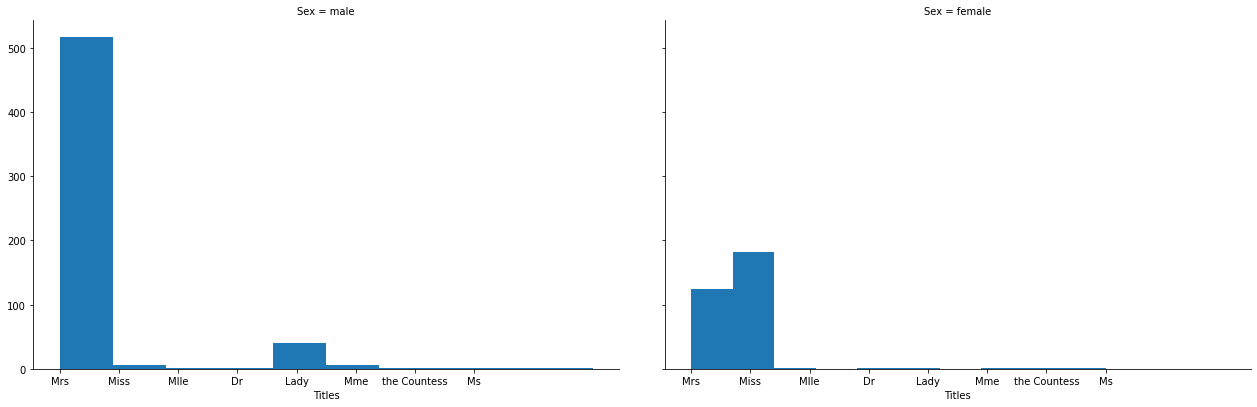

In [87]:
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,"Titles")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

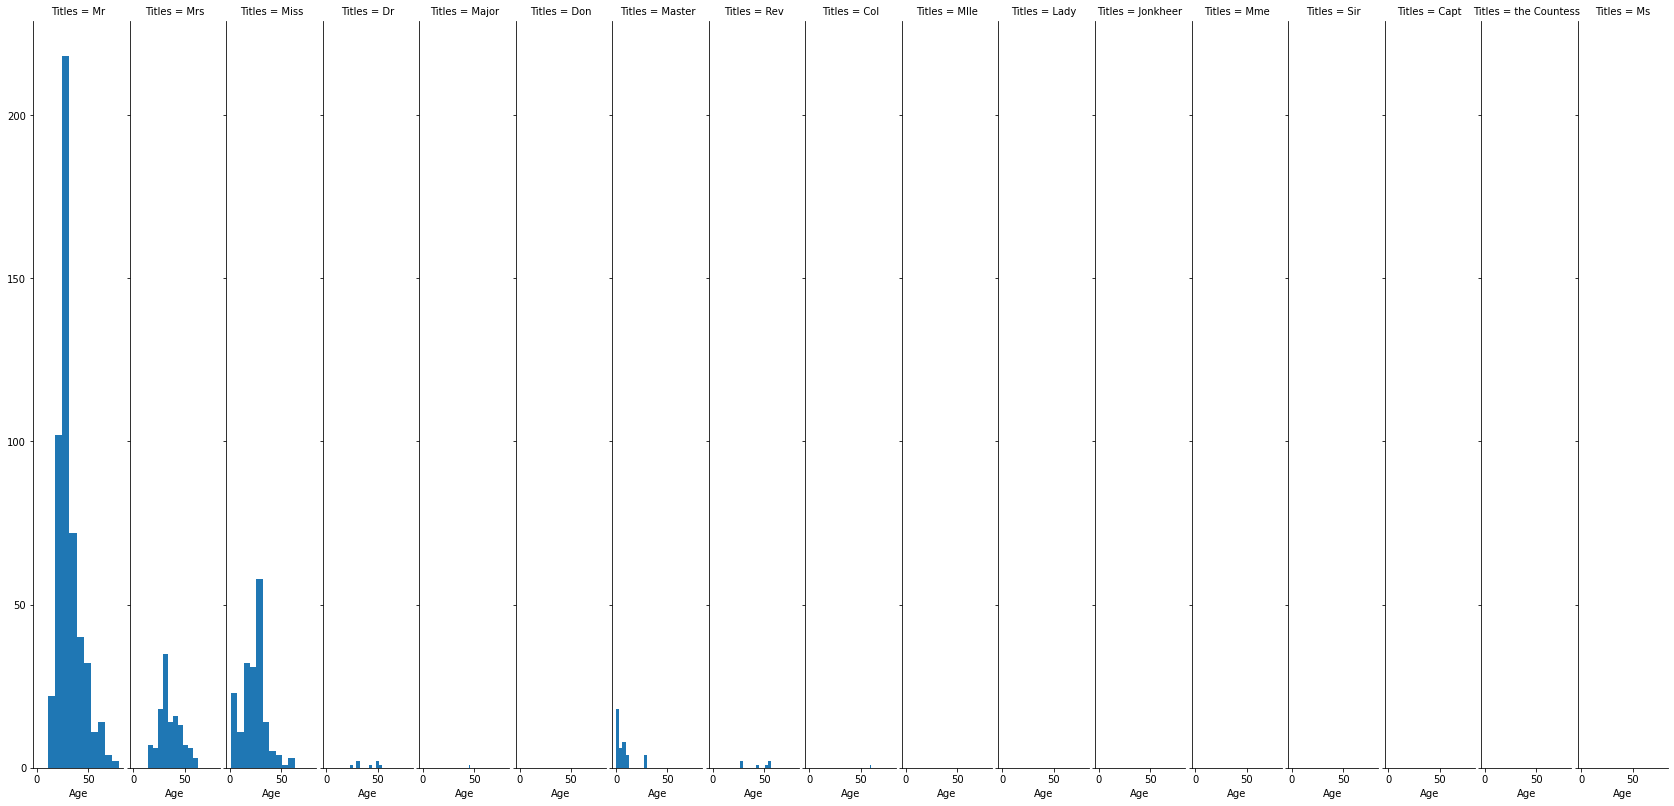

In [88]:
g=sns.FacetGrid(df,col="Titles")
g.map(plt.hist,"Age")
g.fig.set_figwidth(23)
g.fig.set_figheight(15)

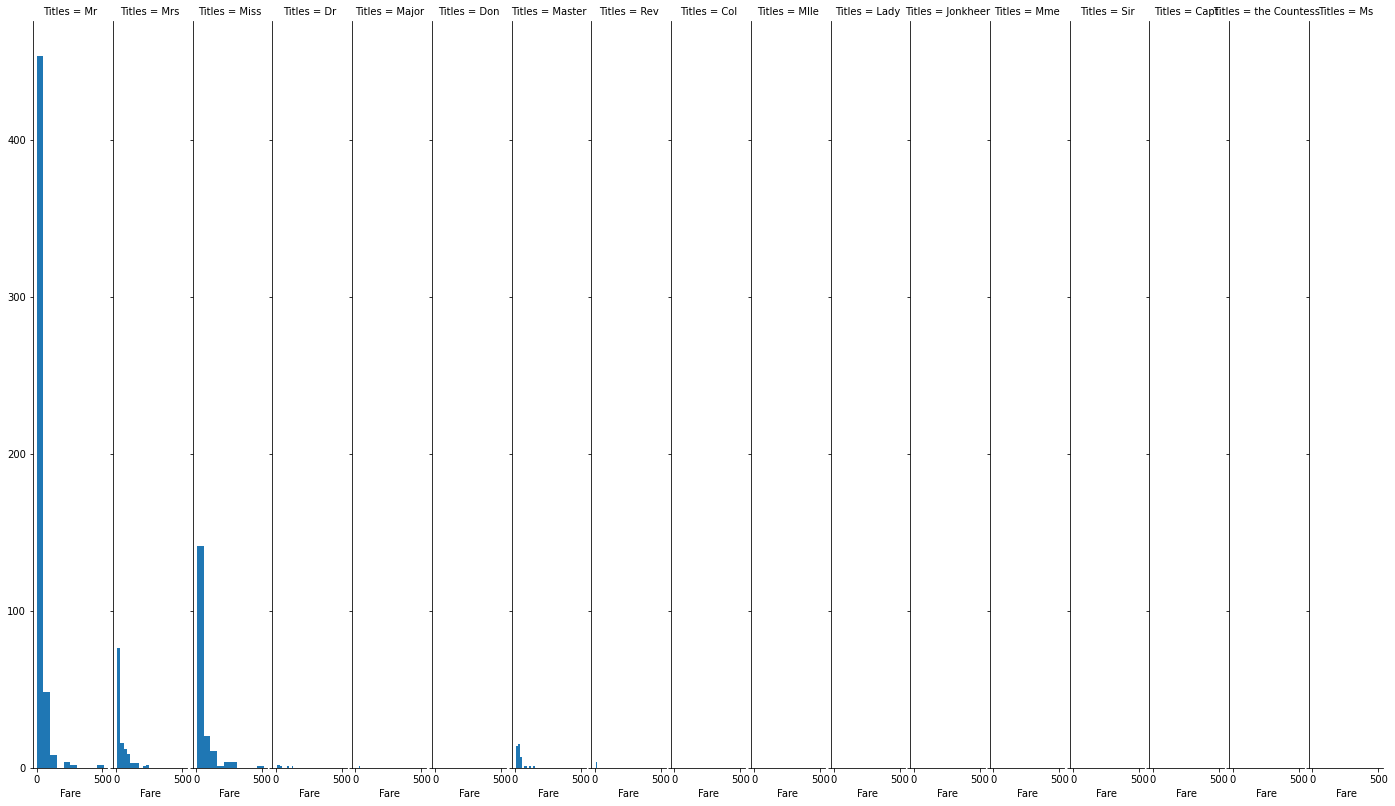

In [90]:
g=sns.FacetGrid(df,col="Titles")
g.map(plt.hist,"Fare")
g.fig.set_figwidth(19)
g.fig.set_figheight(15)

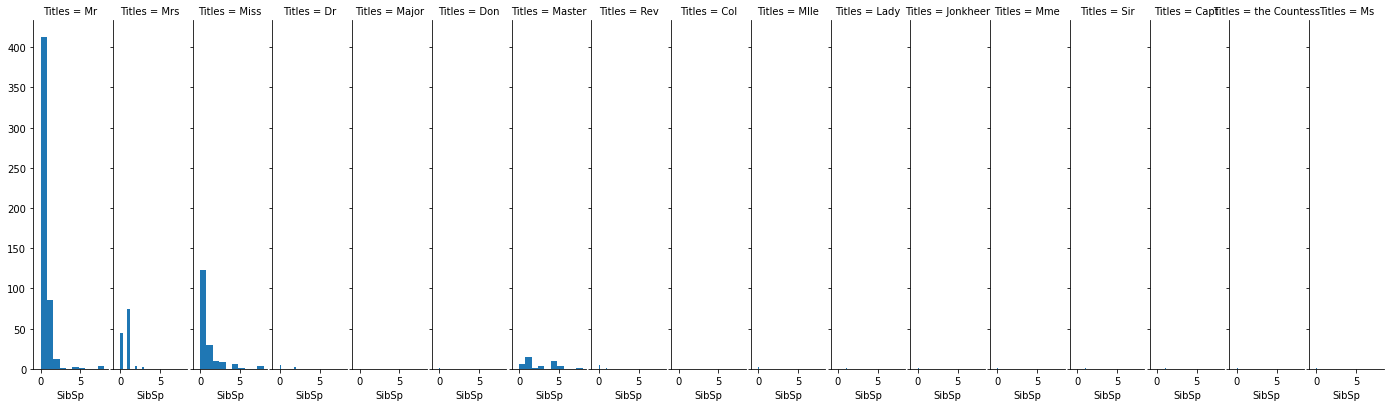

In [98]:
g=sns.FacetGrid(df,col="Titles")
g.map(plt.hist,"SibSp")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

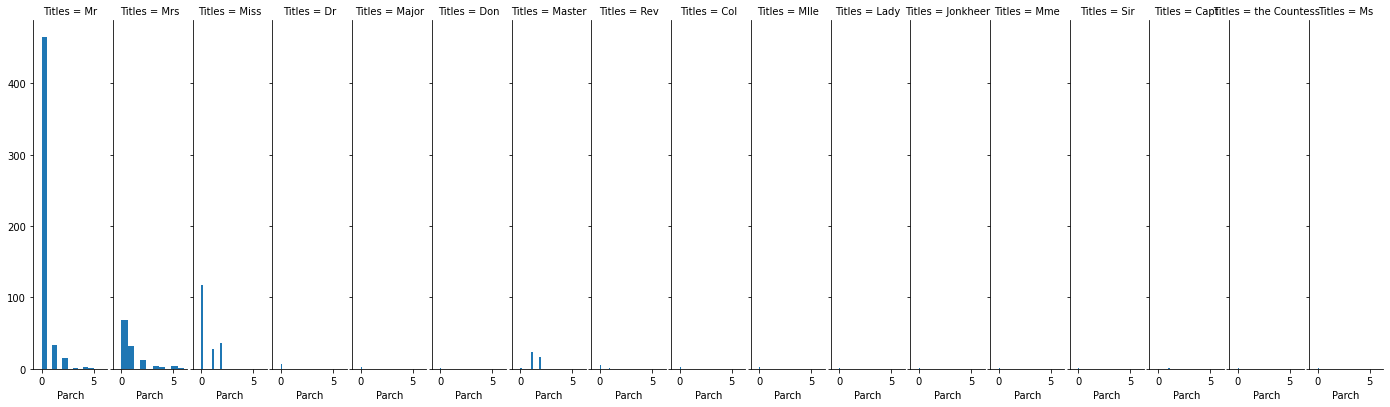

In [97]:
g=sns.FacetGrid(df,col="Titles")
g.map(plt.hist,"Parch")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

In [102]:
newcolumn=[]
for i in range(891):
  newcolumn.append(df.loc[i,"SibSp"]+df.loc[i,"Parch"])
df["FamilySize"]=newcolumn
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mr,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mr,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mr,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,1
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mr,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr,0


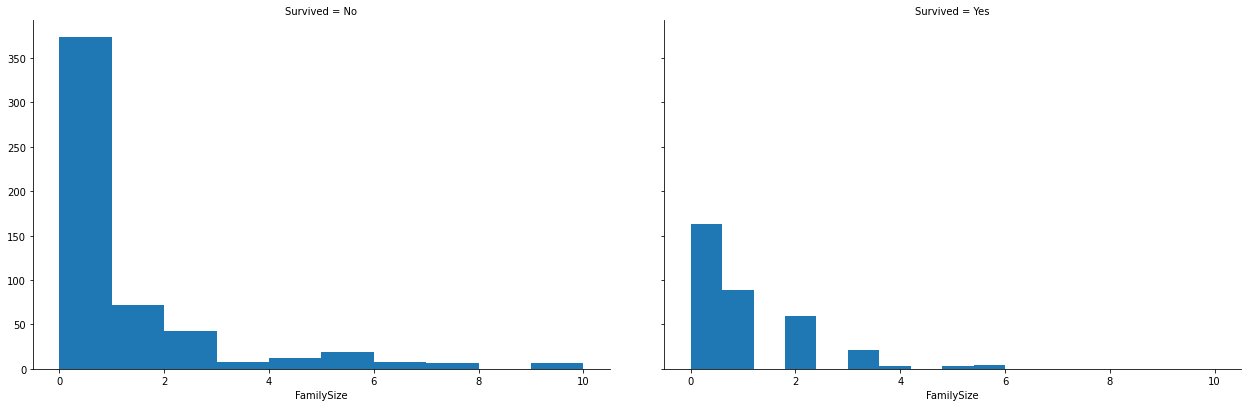

In [104]:
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"FamilySize")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

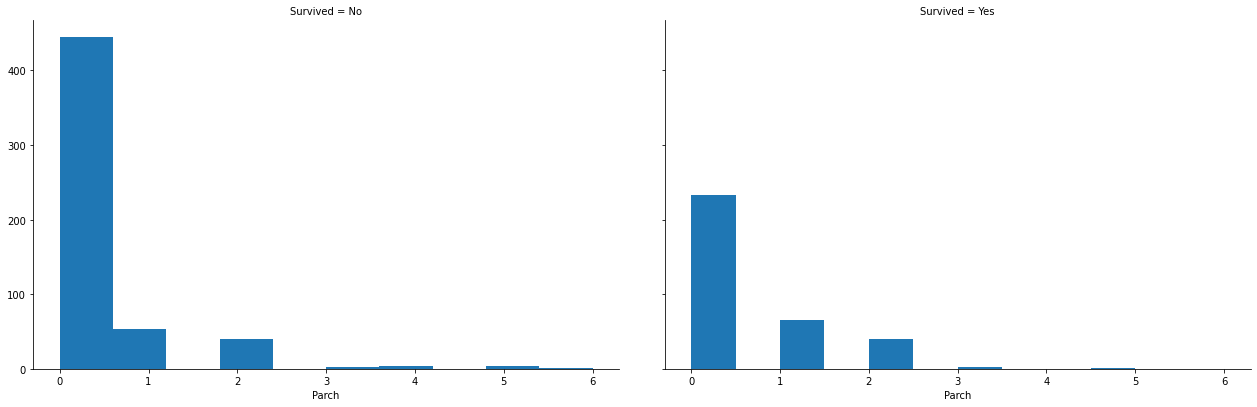

In [106]:
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"Parch")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

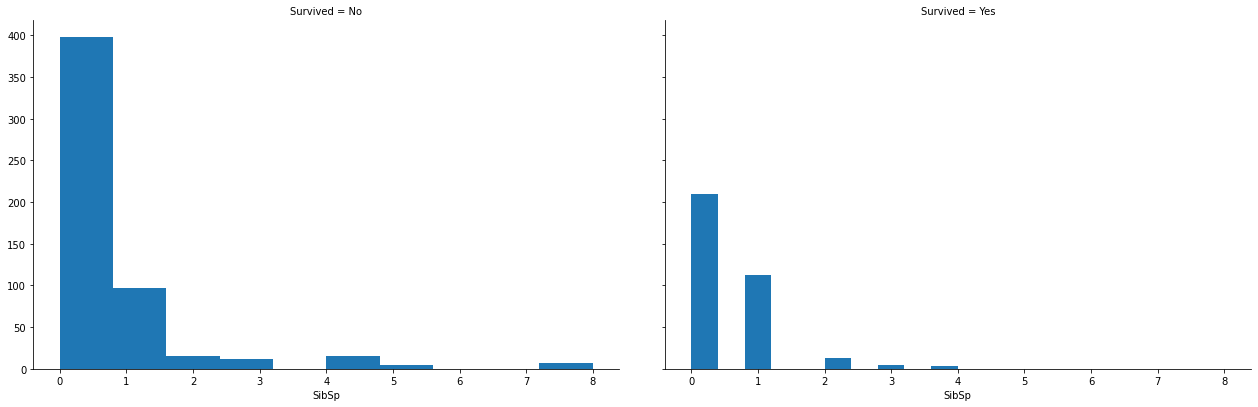

In [105]:
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"SibSp")
g.fig.set_figwidth(19)
g.fig.set_figheight(7)

the familysize feature helps us compare the survival ratings with more precision. also we can use it to compare it with other features so it is useful